## 作业
### 1. 墨尔本1981年至1990年的每月温度情况
请利用数据，画出和题目要求相同的图

In [55]:
import pandas as pd
import numpy as np
ex1 = pd.read_csv('https://raw.githubusercontent.com/datawhalechina/fantastic-matplotlib/main/data/layout_ex1.csv')

In [56]:
ex1.head(13),ex1['Time']

(       Time  Temperature
 0   1981-01    17.712903
 1   1981-02    17.678571
 2   1981-03    13.500000
 3   1981-04    12.356667
 4   1981-05     9.490323
 5   1981-06     7.306667
 6   1981-07     7.577419
 7   1981-08     7.238710
 8   1981-09    10.143333
 9   1981-10    10.087097
 10  1981-11    11.890000
 11  1981-12    13.680645
 12  1982-01    16.567742, 0      1981-01
 1      1981-02
 2      1981-03
 3      1981-04
 4      1981-05
         ...   
 115    1990-08
 116    1990-09
 117    1990-10
 118    1990-11
 119    1990-12
 Name: Time, Length: 120, dtype: object)

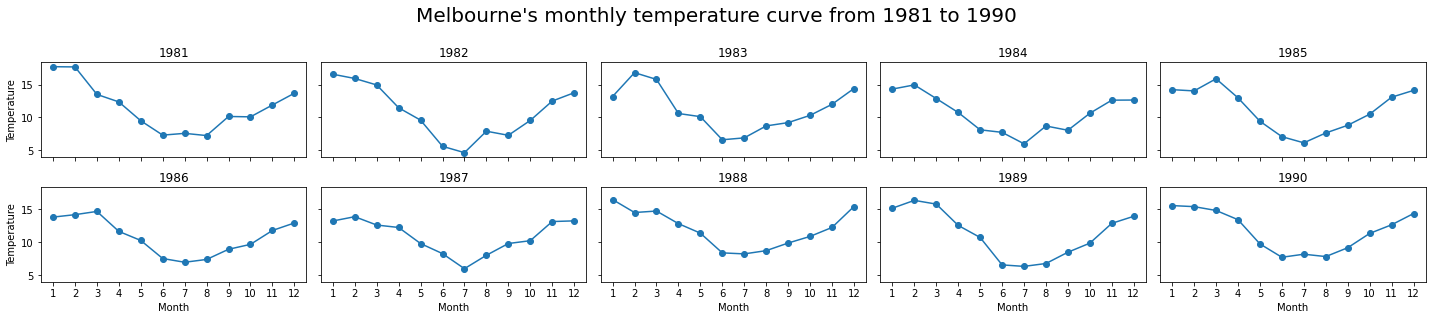

In [77]:
time = np.arange(1,13) # [1,13) => [1,12]
temp = ex1['Temperature'].to_numpy()
fig, axs = plt.subplots(2, 5, figsize = (20, 4),
                        sharex = True, sharey = True)
fig.suptitle('Melbourne\'s monthly temperature curve from 1981 to 1990', 
             size = 20,
             y = 1.1)
for i in range(10):
  rows = i // 5
  cols = i % 5
  lo, hi = 12 * i, 12 * i + 12
  axs[rows][cols].plot(time, temp[lo:hi], marker = 'o')
  axs[rows][cols].set_title('%d' %(1981 + i))
  axs[rows][cols].xaxis.set_ticks(np.arange(1, 13, 1)) # Change the tick frequency
  # axs[rows][cols].set_xlim(0, 13)
  if rows == 1: axs[rows][cols].set_xlabel('Month')
  if cols == 0: axs[rows][cols].set_ylabel('Temperature')

fig.tight_layout()

### 2. 画出数据的散点图和边际分布
用`np.random.randn(2, 150)`生成一组二维数组，使用**两种**非均匀子图的分割方法，作出该数据对应的散点图和边际分布图

In [150]:
nr = np.random.randn(2, 150)
x, y = nr[0], nr[1]

### 1. 使用GridSpec绘制目标非均匀子图 - 调整相对宽度比例和高度比例参数

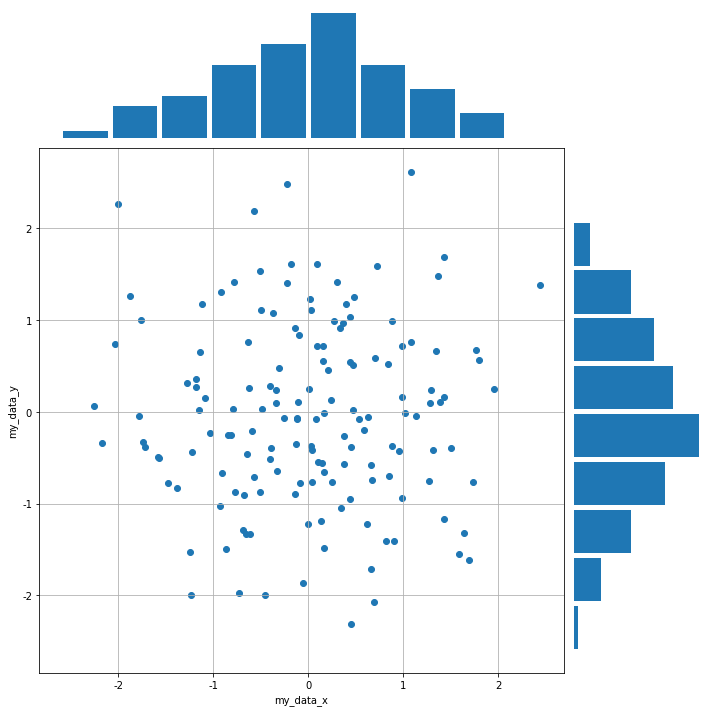

In [151]:
fig = plt.figure(figsize = (10, 10))
spec = fig.add_gridspec(nrows = 2, ncols = 2, width_ratios = (8, 2),
                        height_ratios = (2, 8))
# ax
ax = fig.add_subplot(spec[1, 0])
ax.scatter(x, y)
ax.grid(True)
ax.set_xlabel('my_data_x')
ax.set_ylabel('my_data_y')

# print(np.min(x), np.max(x), np.min(y), np.max(y))
hi = max(np.max(np.abs(x)), np.max(np.abs(y)))
width = 2 * hi / 10 # 10 bins
bins = np.arange(-hi, hi, width)

# axu
axu = fig.add_subplot(spec[0, 0], sharex = ax) # ax up
axu.hist(x, bins = bins, rwidth = 0.9)
axu.set_frame_on(False)
axu.axes.get_xaxis().set_visible(False)
axu.axes.get_yaxis().set_visible(False)

# axr
axr = fig.add_subplot(spec[1, 1], sharey = ax) # ax right
axr.hist(y, bins = bins, rwidth = 0.9, orientation = 'horizontal')
axr.set_frame_on(False)
axr.axes.get_xaxis().set_visible(False)
axr.axes.get_yaxis().set_visible(False)

fig.tight_layout()

### 2. 使用GridSpec绘制目标非均匀子图 - 切片+跨行+跨列

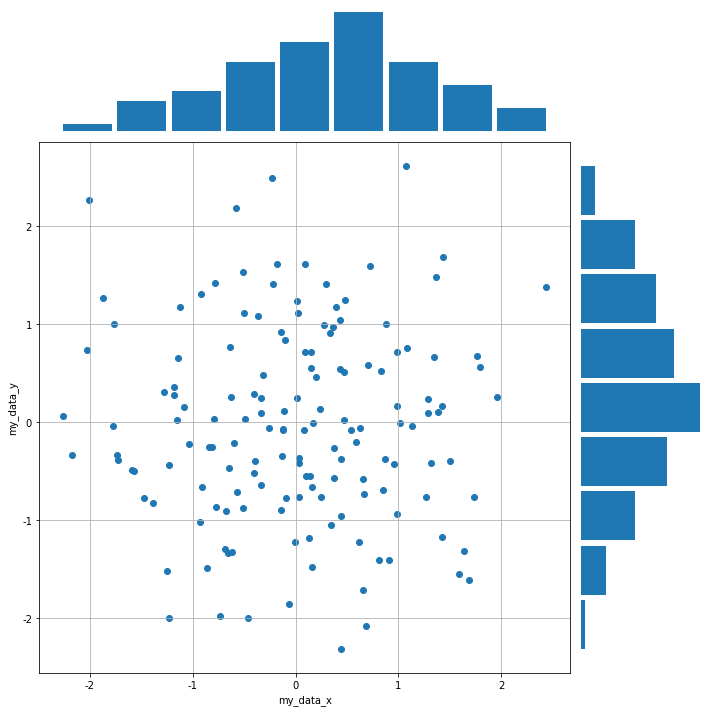

In [158]:
fig = plt.figure(figsize = (10, 10))
spec = fig.add_gridspec(nrows = 10, ncols = 10)

# ax
ax = fig.add_subplot(spec[2:10,0:8])
ax.scatter(x, y)
ax.grid(True)
ax.set_xlabel('my_data_x')
ax.set_ylabel('my_data_y')
# axu
axu = fig.add_subplot(spec[0:2,0:8])
axu.hist(x, bins = bins, rwidth = 0.9)
axu.set_frame_on(False)
axu.axes.get_xaxis().set_visible(False)
axu.axes.get_yaxis().set_visible(False)
# axr
axr = fig.add_subplot(spec[2:10,8:10])
axr.hist(y, bins = bins, rwidth = 0.9, orientation = 'horizontal')
axr.set_frame_on(False)
axr.axes.get_xaxis().set_visible(False)
axr.axes.get_yaxis().set_visible(False)

fig.tight_layout()

## Task03 - 布局格式定方圆
### **在代码中值得注意的地方，都有对应的注释来解释代码**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''
  matplotlib uses matplotlibrc configuration files
to customize all kinds of properties, which we call rc settings
or rc parameteers.
  All of the rc settings are stored in a dictionary-like variable
called matplotlib.rcParams, which is global to the matplotlib package.
rcParams can be modified directly
  axes.unicode_minus : https://matplotlib.org/gallery/api/unicode_minus.html
'''
plt.rcParams['axes.unicode_minus'] = False

### 一、子图
#### 1. 使用`plt.subplots`绘制均匀状态下的子图

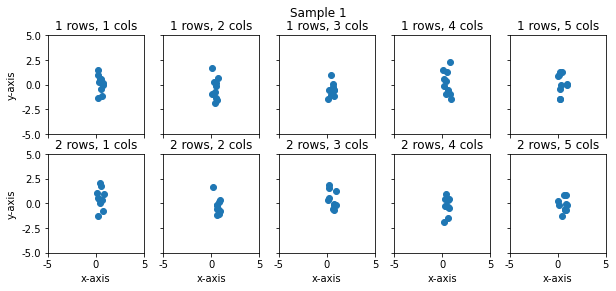

In [15]:
'''
1. sharex,sharey : controls sharing of prperties among x or y axes - True
or 'all' x- or y-axis will be shared among all subplots
2. scatter : A scatter plot of y vs. x with varying marker size and/or color.
3. tight_layout() : Routines to adjust subplot params 
so that subplots are nicely fit in the figure.
'''
fig, axs = plt.subplots(2, 5, figsize = (10, 4), sharex = True, sharey = True)
fig.suptitle('Sample 1', size = 12)
for i in range(2):
  for j in range(5):
    axs[i][j].scatter(np.random.rand(10), np.random.randn(10)) #(x, y)
    axs[i][j].set_title('%d rows, %d cols' %(i+1, j+1))
    axs[i][j].set_xlim(-5, 5)
    axs[i][j].set_ylim(-5, 5)
    if i == 1: axs[i][j].set_xlabel('x-axis')
    if j == 0: axs[i][j].set_ylabel('y-axis')
fig.tight_layout()

#### 2. 使用`GridSpec`绘制非均匀子图
非均匀
- 图的比例大小不同，无跨行跨列
- 图跨行跨列

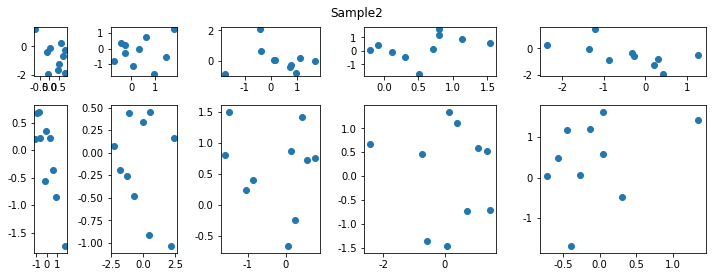

In [26]:
'''
Specifies the geometry of the grid that a subplot can be placed in.
The location of grid is determined by similar way as the SubplotParams.
The number of rows and number of columns of the grid need to be set. 
---
nrows : Number of rows in grid
ncols : Number of columns in grid
width_ratios : Width ratios of the columns [1:2:3:4:5]
height_ratios : Height ratios of the rows [1:3]
'''
fig = plt.figure(figsize = (10, 4))
spec = fig.add_gridspec(nrows = 2, ncols = 5,
                        width_ratios = [1,2,3,4,5],
                        height_ratios = [1,3])
fig.suptitle('Sample2', size = 12)
for i in range(2):
  for j in range(5):
    ax = fig.add_subplot(spec[i, j])
    ax.scatter(np.random.randn(10), np.random.randn(10))
    axs[i][j].set_title('%d rows, %d cols' %(i+1, j+1))
    if i == 1: axs[i][j].set_xlabel('x-axis')
    if j == 0: axs[i][j].set_ylabel('y-axis')
spec.tight_layout(fig, rect=[0, 0.03, 1, 0.95])

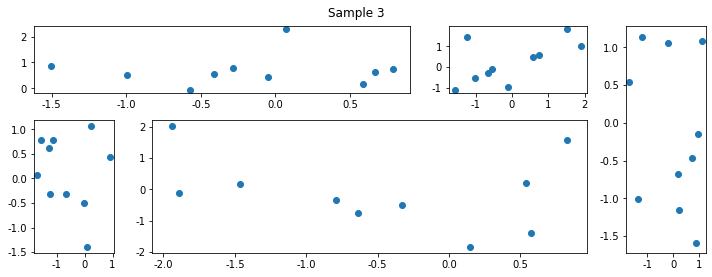

In [25]:
'''
Merge subplots by using Python slice
'''

fig = plt.figure(figsize = (10, 4))
spec = fig.add_gridspec(nrows = 2, ncols = 6,
                        width_ratios = [2, 2.5, 3, 1 ,1.5 ,2],
                        height_ratios = [1, 2])
fig.suptitle('Sample 3', size = 12)
# sub1
ax = fig.add_subplot(spec[0, :3]) # 0 row, first 3 columns merge into => 1 ax
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5]) # 0 row, 3 - 5 columns merge into 1 ax
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5]) # 0 and 1 rows, 5 columns
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0]) # [1, 0]
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5]) # [1, 1 - ]
ax.scatter(np.random.randn(10), np.random.randn(10))
spec.tight_layout(fig, rect=[0, 0.03, 1, 0.95])

### 二、子图上的方法
在对象`ax`对象上定义了和`plt`类似的图形绘制函数

常用的有`plot,hist,scatter,bar,barh,pie`，分别对应[Line2D，直方图，散点图，柱状图，横向柱状图(horizontal bar)饼图]

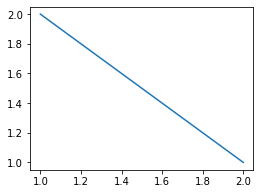

In [27]:
fig, ax = plt.subplots(figsize = (4, 3))
ax.plot([1,2],[2,1])

(array([  1.,  12.,  43., 126., 215., 241., 203., 111.,  39.,   9.]),
 array([-3.45394421, -2.82085616, -2.1877681 , -1.55468005, -0.921592  ,
        -0.28850395,  0.3445841 ,  0.97767216,  1.61076021,  2.24384826,
         2.87693631]),
 <a list of 10 Patch objects>)

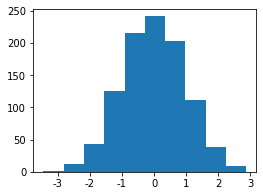

In [28]:
fig, ax = plt.subplots(figsize = (4, 3))
ax.hist(np.random.randn(1000))

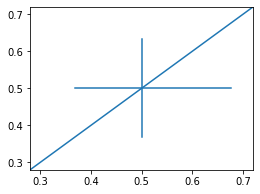

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (4, 3))
ax.axhline(0.5, 0.2, 0.9) # Add a horizontal line across the axis
# (start x, start y, length)
ax.axvline(0.5, 0.2, 0.8) # Add a vertical line across the axes
# (start x, start y, length)
ax.axline((0.3, 0.3),(0.7, 0.7)) # Requires matplotlib version> 3.3

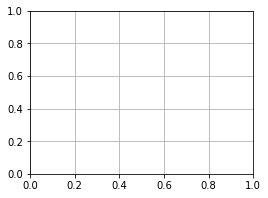

In [39]:
#Add the gray grid
fig, ax = plt.subplots(figsize = (4,3))
ax.grid(True)

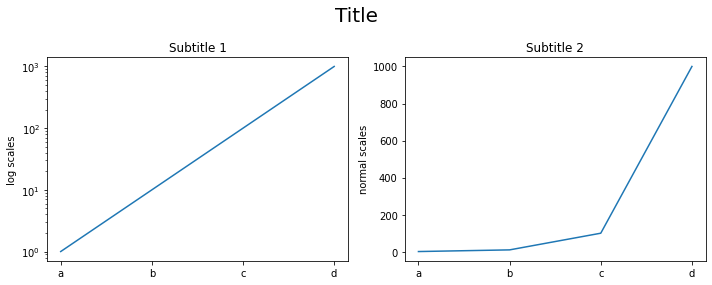

In [6]:
'''
Use [set_xscale, set_title, set_xlabel] to set the scale 
(logarithmic coordinates, etc.), title, and axis name respectively
'''

fig, axs = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Title', size = 20)
for j in range(2):
  axs[j].plot(list('abcd'), [10**i for i in range(4)])
  if j == 0:
    axs[j].set_yscale('log')
    axs[j].set_title('Subtitle 1')
    axs[j].set_ylabel('log scales')
  else:
    axs[j].set_title('Subtitle 2')
    axs[j].set_ylabel('normal scales')
fig.tight_layout()

Text(0.8, 0.2, 'This is a midpoint')

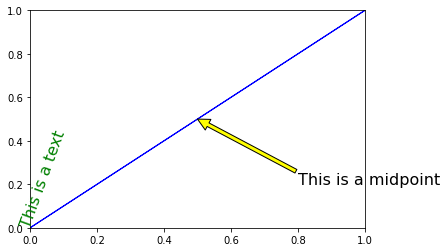

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.arrow(0, 0, 1, 1, head_width = 0.03, head_length=0.05, 
         facecolor = 'red', edgecolor = 'blue') # (0,0) -> (1,1)
ax.text(x = 0, y = 0, s = 'This is a text', fontsize = 16, rotation = 70,
        rotation_mode = 'anchor', color = 'green')
ax.annotate('This is a midpoint', xy = (0.5, 0.5), xytext = (0.8, 0.2), 
            arrowprops = dict(facecolor = 'yellow', edgecolor = 'black'), 
            fontsize = 16)

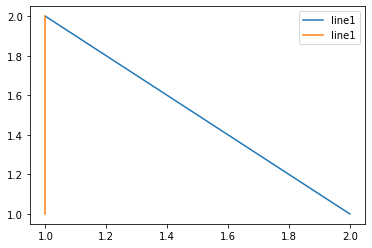

In [8]:
'''
ax.legend()
The location of the legend.
Location String & Location Code
https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html
'''
fig, ax = plt.subplots()
ax.plot([1,2], [2,1], label = "line1")
ax.plot([1,1], [1,2], label = "line1")
ax.legend(loc = 1)